In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[ : ,1:-1].values
y = df.iloc[ :, -1].values

In [96]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [97]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [98]:
# reshape the y because : In standerlization we use 2d array as input
y = y.reshape(len(y), 1, order='C', copy=False)
#copy=True: A new copy of the array with the new shape is created, using new memory. Changes to the reshaped array will not affect the original array.

In [99]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [100]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [101]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [102]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [103]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\AMLAN PATRA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [105]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

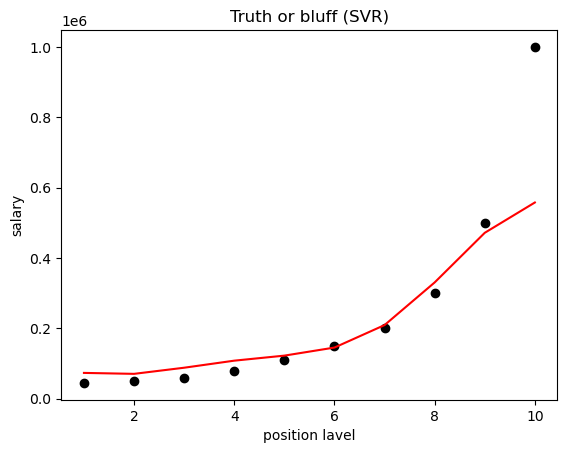

In [106]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'black')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='red')
plt.title('Truth or bluff (SVR)')
plt.xlabel('position lavel')
plt.ylabel('salary')
plt.show()

C:\Users\AMLAN PATRA\AppData\Local\Temp\ipykernel_21544\1858613754.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


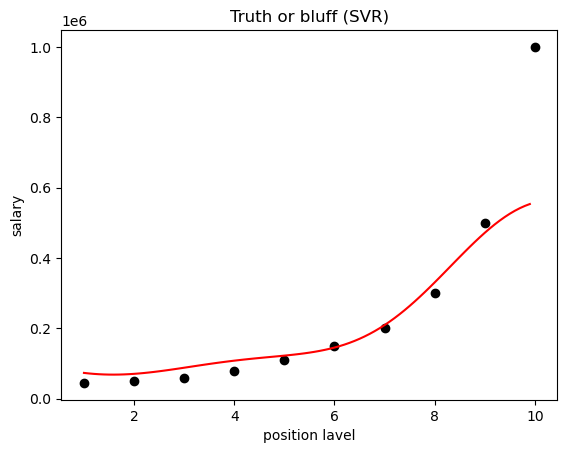

In [109]:
#  For high resolution and smooth curve
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='black')
plt.plot(
    x_grid, 
    sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)),
    color='red'
)
plt.title('Truth or bluff (SVR)')
plt.xlabel('position lavel')
plt.ylabel('salary')
plt.show()

C:\Users\AMLAN PATRA\AppData\Local\Temp\ipykernel_21544\4170688689.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)


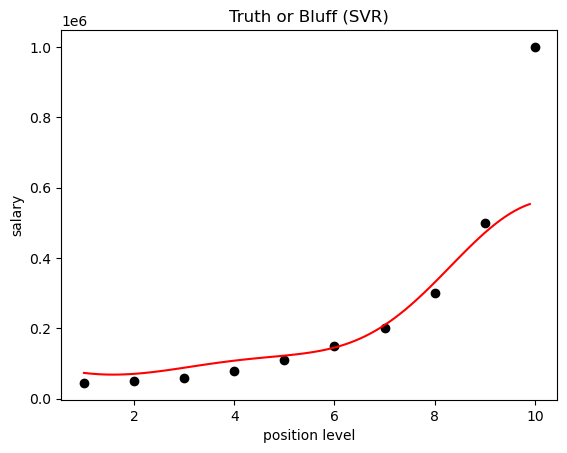

In [108]:
# # Creating high-resolution x_grid for smooth curve
# x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
# x_grid = x_grid.reshape(-1, 1)
# # Plotting the actual data points (in original scale)
# plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='black')
# # Plotting the smooth SVR model predictions
# plt.plot(
#     x_grid, 
#     sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)),
#     color='red'
# )
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('position level')
# plt.ylabel('salary')
# plt.show()
